<a href="https://colab.research.google.com/github/Riccardolotorto/MachineLearning_Python/blob/main/RipassoRegressione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


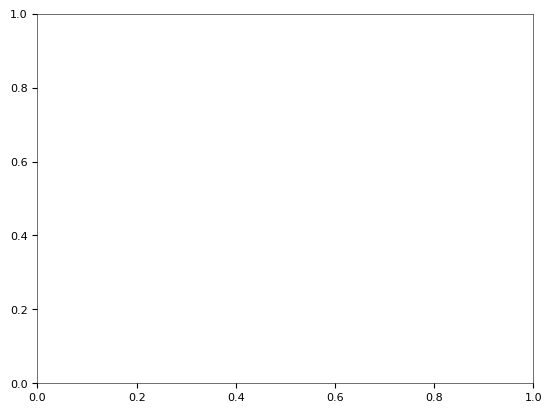

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Python/Machine Learning/data/imports-85.data", header = None)
data.head()

In [7]:
data = data.drop([2, 6, 7, 14, 15, 17], axis = 1)

In [8]:
data

,0,1,3,4,5,8,9,10,11,12,13,16,18,19,20,21,22,23,24,25
0,3,?,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,front,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,gas,turbo,four,front,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,gas,std,four,front,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,diesel,turbo,four,front,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [18]:
data[3] = data[3].replace(['gas', 'diesel'], [0, 1])
data.head()

,0,1,3,4,5,8,9,10,11,12,13,16,18,19,20,21,22,23,24,25
0,3,?,0,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,0,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,0,std,two,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,0,std,four,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,0,std,four,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
data[8] = data[8].replace(['front', 'rear'], [0, 1])
data.head()

,0,1,3,4,5,8,9,10,11,12,13,16,18,19,20,21,22,23,24,25
0,3,?,0,std,two,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,0,std,two,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,0,std,two,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,0,std,four,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,0,std,four,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
data = data.drop([4, 5], axis = 1)

In [29]:
data = data.drop(data[data[1] == '?'].index)

In [30]:
data

,0,1,3,8,9,10,11,12,13,16,18,19,20,21,22,23,24,25
3,2,164,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,0,0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,0,0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,0,0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,0,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,0,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,0,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,1,0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [39]:
data = data.replace('?', np.nan, regex=False)

In [40]:
data = data.dropna(how='any').dropna(how='any', axis=1)   #controllo se ci sono dati nulli

In [41]:
dataNp = data.to_numpy()

In [42]:
X = dataNp[:, 0:-1]
Y = dataNp[:, -1]

In [43]:
X

array([[2, '164', 0, ..., '5500', 24, 30],
       [2, '164', 0, ..., '5500', 18, 22],
       [1, '158', 0, ..., '5500', 19, 25],
       ...,
       [-1, '95', 0, ..., '5500', 18, 23],
       [-1, '95', 1, ..., '4800', 26, 27],
       [-1, '95', 0, ..., '5400', 19, 25]], dtype=object)

In [44]:
Y

array(['13950', '17450', '17710', '23875', '16430', '16925', '20970',
       '21105', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '32250', '5195', '6095', '6795', '6695', '7395',
       '8845', '8495', '10595', '10245', '11245', '18280', '25552',
       '28248', '28176', '31600', '35056', '5389', '6189', '6669', '7689',
       '9959', '8499', '6989', '8189', '9279', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '13499', '17199', '19699',
       '18399', '11900', '13200', '15580', '16900', '16630', '17950',
       '18150', '5572', '7957', '6229', '6692', '7609', '8921', '22018',
       '11850', '12170', '15040', '15510', '18150', '18620', '5118',
       '7053', '7603', '7126', '7775', '9960', '9233', '11259', '7463',
   

In [45]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.33,
                                                    random_state = 123) # fix random seed for replicability

In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((107, 17), (107,), (53, 17), (53,))

In [47]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[2 '134' 0 0 98.4 176.2 65.6 53.0 2975 146 '3.62' '3.50' 9.3 '116'
  '4800' 24 30]
 [-1 '95' 0 0 109.1 188.8 68.8 55.5 3049 141 '3.78' '3.15' 8.7 '160'
  '5300' 19 25]
 [-2 '103' 0 0 104.3 188.8 67.2 56.2 2935 141 '3.78' '3.15' 9.5 '114'
  '5400' 24 28]
 [0 '102' 0 0 97.2 172.0 65.4 52.5 2145 108 '3.62' '2.64' 9.5 '82' '4800'
  32 37]
 [1 '104' 0 0 93.1 159.1 64.2 54.1 1900 91 '3.03' '3.15' 9.0 '68' '5000'
  31 38]
 [-1 '95' 0 0 109.1 188.8 68.9 55.5 3062 141 '3.78' '3.15' 9.5 '114'
  '5400' 19 25]
 [-1 '93' 1 0 110.0 190.9 70.3 58.7 3750 183 '3.58' '3.64' 21.5 '123'
  '4350' 22 25]
 [-1 '95' 0 0 109.1 188.8 68.9 55.5 2952 141 '3.78' '3.15' 9.5 '114'
  '5400' 23 28]
 [1 '113' 0 0 93.1 166.8 64.2 54.1 1950 91 '3.08' '3.15' 9.0 '68' '5000'
  31 38]
 [0 '102' 0 0 97.2 172.0 65.4 52.5 2340 108 '3.62' '2.64' 9.0 '94' '5200'
  26 32]]
y_train = ['17669' '19045' '15985' '7126' '6095' '22625' '28248' '16845' '7395'
 '9960']


In [48]:
#Using sklearn package to model data :
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
predict = regr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, predict))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, predict))

Coefficients: 
 [ 1.00588803e+02 -1.40871285e+01  3.59561829e+03  1.90498994e-09
  1.52424406e+02 -7.47116630e+01  9.22110586e+02 -1.24775697e+02
  5.53457685e+00  3.56302804e+01 -2.59935540e+03 -1.29612947e+03
 -1.13613813e+02  2.08382404e+01  5.65657592e-01  6.62479887e+00
 -8.94309450e+01]
Mean squared error: 7846797.51
Coefficient of determination: 0.72
